# Лабораторная работа 4-5

In [ ]:
import numpy as np
from numpy import isnan

import pandas as pd

hours = "hour"
requests = "n_requests"
data = pd.read_csv("/content/web_traffic.tsv", delimiter='\t', names=[hours, requests])

hours_data = data[hours]
requests_data = data[requests]

# TODO: Использовать функцию notna()
hours_data = hours_data[requests_data.notna()]
requests_data = requests_data[requests_data.notna()]

print(hours_data, requests_data)

0        1
2        3
3        4
4        5
5        6
      ... 
738    739
739    740
740    741
741    742
742    743
Name: hour, Length: 735, dtype: int64 0      2272.0
2      1386.0
3      1365.0
4      1488.0
5      1337.0
        ...  
738    4970.0
739    4813.0
740    5392.0
741    5906.0
742    4881.0
Name: n_requests, Length: 735, dtype: float64


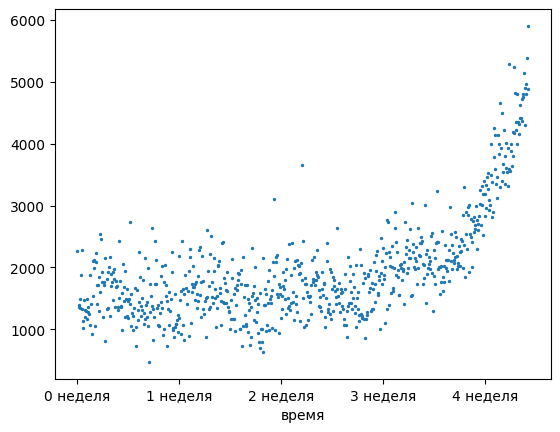

In [ ]:
# Визуализация

import matplotlib.pyplot as plt

plt.scatter(hours_data, requests_data, s=2)
plt.xlabel('время')

plt.xticks([w*7*24 for w in range(6)],["%i неделя" %w for w in range(6)])

plt.autoscale(tight=False)

plt.show()

In [ ]:
# np.polyfit(x, y, степень)
def poly(deq):
  return np.polyfit(hours_data, requests_data, deq, full=True)[0]

deqs = [1, 2, 3, 5, 10, 20]

for i in deqs:
  print(f"Параметры модели {i} {poly(i)}")


Параметры модели 1 [  2.59619213 989.02487106]
Параметры модели 2 [ 1.05322215e-02 -5.26545650e+00  1.97476082e+03]
Параметры модели 3 [ 3.04960132e-05 -2.35893797e-02  4.94226019e+00  1.33328797e+03]
Параметры модели 5 [ 2.16470951e-10 -3.13405153e-07  1.63844797e-04 -3.41497485e-02
  2.24785575e+00  1.53616050e+03]
Параметры модели 10 [-3.73981968e-22  1.36473756e-18 -2.14294406e-15  1.89884971e-12
 -1.04570108e-09  3.70867731e-07 -8.45604588e-05  1.19167041e-02
 -9.41618606e-01  3.33703840e+01  1.26421204e+03]
Параметры модели 20 [ 4.83083052e-47 -3.18250090e-43  8.87206977e-40 -1.31483435e-36
  9.87786034e-34 -8.55507407e-32 -5.09641038e-28  3.80310883e-25
  4.98714778e-23 -2.74828672e-19  2.35472030e-16 -1.17297667e-13
  3.93130463e-11 -9.23449401e-09  1.52941753e-06 -1.76097684e-04
  1.36396359e-02 -6.69559855e-01  1.86541218e+01 -2.35173676e+02
  2.33819938e+03]


Таким образом, наша модель будет выглядеть следующим образом:
```
f(x) = 2.59619213 * x + 989.02487106
```

Посчитаем ошибку нашей модели:

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
format = "{:2} {:<20} {:<20} {:<20} {:<20} {:<20}"

print(format.format(" #", "r2", "mse", "rmse", "rmse manual", "diff"))

def rmse_c(x, y):
  sum = 0
  if len(x) != len(y):
    raise ValueError()
  for i in range(len(x)):
    sum += (x.iloc[i] - y[i]) ** 2
  return (sum/len(x))**(1/2)

for i in deqs:
  fx = np.poly1d(poly(i))
  r2_array = []  # здесь будут храниться значения точности
  r2_array.append(r2_score(requests_data,  fx(hours_data)))
  rmse = mean_squared_error(requests_data, fx(hours_data), squared=False)
  mse = mean_squared_error(requests_data,  fx(hours_data), squared=True)
  rmse_calc = rmse_c(requests_data, fx(hours_data))

  print(format.format(i, r2_array[0], mse, rmse, rmse_calc, abs(rmse-rmse_calc)))

 # r2                   mse                  rmse                 rmse manual          diff                
 1 0.41632369094258914  431822.81270718103   657.1322642415156    657.1322642415155    1.1368683772161603e-13
 2 0.6690122985058977   244875.52092269278   494.84898799804853   494.84898799804864   1.1368683772161603e-13
 3 0.7437366099834488   189592.0326962248    435.4216722858714    435.42167228587147   5.684341886080802e-14
 5 0.7711107518847922   169339.74770906617   411.50911011673384   411.5091101167338    5.684341886080802e-14
10 0.7757493961877407   165907.92702530022   407.31796796274557   407.31796796274546   1.1368683772161603e-13
20 0.7967407157687268   150377.86263304277   387.78584635471515   387.7858463547152    5.684341886080802e-14


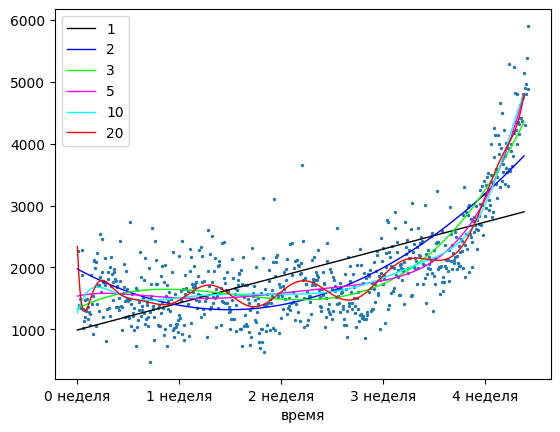

In [ ]:
# Визуализация

import matplotlib.pyplot as plt

plt.scatter(hours_data, requests_data, s=2)
plt.xlabel('время')

plt.xticks([w*7*24 for w in range(6)],["%i неделя" %w for w in range(6)])

# отобразим модель #1
f2x = np.linspace(0, hours_data[len(hours_data)], len(hours_data))
f2y = fx(f2x)

colors = ['black', 'blue', 'lime', 'magenta', 'cyan', 'red']
deqs = [1, 2, 3, 5, 10, 20]
for i, d in enumerate(deqs):
  f2y = np.poly1d(poly(d))(f2x)
  plt.plot(f2x, f2y, linewidth=1.0, color=colors[i], label=d)

plt.autoscale(tight=False)
plt.legend()
plt.show()

(117,) (117,)
(30,)
[-0.04562453699059543] 258011.51302650385 507.9483369659791


KeyError: 112

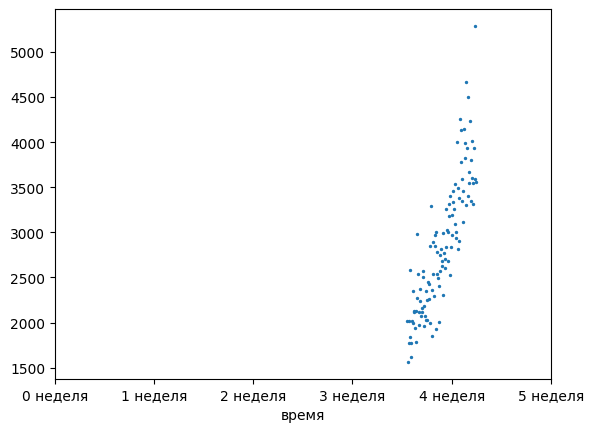

In [ ]:
train_border = 3.5
final_border = 4.2

train_data  = int(train_border * 7 * 24)
final_border = int(final_border * 7 * 24)

# train set
hours_data_1, requests_data_1 = hours_data[train_data:final_border], requests_data[train_data:final_border]
# test set
hours_data_2, requests_data_2 = hours_data[final_border:], requests_data[final_border:]
print(hours_data_1.shape, requests_data_1.shape)
print(requests_data_2.shape)

f2p_1, residuals_1, rank_1, sv_1, rcond_1 = np.polyfit(hours_data_1, requests_data_1, 3, full=True)

from sklearn.metrics import r2_score, mean_squared_error
fx_1 = np.poly1d(f2p_1)
r2_array_1 = []  # здесь будут храниться значения точности
r2_array_1.append(r2_score(requests_data_2, fx_1(hours_data_2)))
rmse = mean_squared_error(requests_data_2,fx_1(hours_data_2), squared=False)
mse = mean_squared_error(requests_data_2,fx_1(hours_data_2), squared=True)
print(r2_array_1, mse, rmse)

import matplotlib.pyplot as plt

plt.scatter(hours_data_1, requests_data_1, s=2)
plt.xlabel('время')

plt.xticks([w*7*24 for w in range(6)],["%i неделя" %w for w in range(6)])

# отобразим модель #1
f2x = np.linspace(0, hours_data_1[len(hours_data_1)], len(hours_data_1))
f2y = fx(f2x)

colors = ['black', 'blue', 'lime', 'magenta', 'cyan', 'red']
deqs = [1, 2, 3, 5, 10, 20]
for i, d in enumerate(deqs):
  f2y = np.poly1d(poly(d))(f2x)
  plt.plot(f2x, f2y, linewidth=1.0, color=colors[i], label=d)

plt.autoscale(tight=False)

plt.show()